# Cleanup labels used in adata.obs and main SPRING plot

## Import statements

In [1]:
import os,sys
import datetime

In [2]:
import scanpy as sc
sc.logging.print_versions()
sc.logging.print_memory_usage()
sc.settings.verbosity = 2

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.7 numpy==1.15.4 scipy==1.3.1 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1
Memory usage: current 0.20 GB, difference +0.20 GB


In [3]:
## This cell is run once to download my custom functions and import statements from github
#
#!git clone --depth=1 https://github.com/rapolaszilionis/utility_functions
#    
## github doesn't seem to have an option to download a specific version of the repo from the history.
## So I download my utility functions and save the download time by appending it to the directory name.
## These utility functions to be shared together with the notebook.
#
#toappend = datetime.datetime.now().strftime('%y%m%d_%Hh%M')
#newname = "utility_functions_%s"%toappend
#print(newname)
#
#
## rename the py file with utility functions
#os.rename("utility_functions",newname)

In [4]:
# add the utility function folder to PATH
sys.path.append(os.path.abspath("utility_functions_200517_09h14/"))

from rz_import_statements import *
import rz_functions as rz
import rz_fig_params # this adjust mpl.rcParams, almost nothing to import, import after scanpy to overwrite rc.Params
import rz_utility_spring as srz

python version: 3.6.7


## Load cell annotations (obs)

In [5]:
# load obs with classifier results
obs = rz.load_df('backups/obs_info_27563x31_201025_13h12.npz')

## Update the population labels

In [6]:
# the main working label "*population": remove "m", a few underscores
renamer = {key:key[1:].replace('_','') for key in obs['*population'].dropna().unique()}
for key in renamer:
    if 'Cd' in key:
        renamer[key] = key[1:]
        
        
renamer['mPlasma'] = 'Plasma cells'
renamer

{'mB cells': 'B cells',
 'mNK cells': 'NK cells',
 'mN4': 'N4',
 'mMac1': 'Mac1',
 'mMono1': 'Mono1',
 'mN1': 'N1',
 'mT_Cd8_Ccr7hi': 'T_Cd8_Ccr7hi',
 'mMono3': 'Mono3',
 'mT_Cd8_Cxcr3hi': 'T_Cd8_Cxcr3hi',
 'mMac2': 'Mac2',
 'mN5': 'N5',
 'mN6': 'N6',
 'mN3': 'N3',
 'mT_Cd4': 'T_Cd4',
 'mMono2': 'Mono2',
 'mMonoDC': 'MonoDC',
 'mDC3': 'DC3',
 'mMac4': 'Mac4',
 'mT_reg': 'Treg',
 'mDC1': 'DC1',
 'mN2': 'N2',
 'mpDC': 'pDC',
 'mDC2': 'DC2',
 'mT_gd': 'Tgd',
 'mBasophils': 'Basophils',
 'mILC': 'ILC',
 'mPlasma': 'Plasma cells',
 'mMac3': 'Mac3'}

In [8]:
[i for i in renamer.values() if i.startswith('N')]

['NK cells', 'N4', 'N1', 'N5', 'N6', 'N3', 'N2']

In [9]:
# additional "major population" label
rev_merger = {
    "T cells":['T_Cd8_Ccr7hi','T_Cd8_Cxcr3hi', 'T_Cd4', 'Treg', 'Tgd'],
    "B cells":['B cells','Plasma cells'],
    "NK cells":['NK cells'],
    "Dendritic cells":['DC3', 'DC1', 'DC2','pDC'],
    "Monocytes/Macrophages":['Mac1', 'Mono1', 'Mono3', 'Mac2', 'Mono2', 'MonoDC', 'Mac4', 'Mac3'],
    "Basophils":['Basophils'],
    "Neutrophils":['N4', 'N1', 'N5', 'N6', 'N3', 'N2'],
    
}

merger = {element:key for key,value in rev_merger.items() for element in value}

In [10]:
# edit obs
obs['*population'] = [renamer[i] if i in renamer else i for i in obs['*population']]

In [11]:
obs['Major cell type'] = [merger[i] if i in merger else i for i in obs['*population']]

## Make a copy of main SPRING plot, update name

In [12]:
path1 = "/Users/rapolaszilionis/Google\ Drive/analyses/SPRING_dev/data/pittet"
project_dir = path1+'/CSF1Ri/'
plot_name = 'all_cells_clean_iter3'
new_plot_name = 'all_Cd45pos_cells'

sourcepath = project_dir+plot_name
targetpath = project_dir+new_plot_name


!mkdir targetpath
!rsync -rhv $sourcepath/* $targetpath/

building file list ... done
created directory /Users/rapolaszilionis/Google Drive/analyses/SPRING_dev/data/pittet/CSF1Ri/all_Cd45pos_cells
categorical_coloring_data.json
categorical_coloring_data.json.backup_200607_22h08
categorical_coloring_data.json.backup_200607_22h30
categorical_coloring_data.json.backup_200609_22h41
categorical_coloring_data.json.backup_200609_22h52
categorical_coloring_data.json.backup_200621_19h28
categorical_coloring_data.json.backup_200621_19h29
categorical_coloring_data.json.backup_200629_08h35
categorical_coloring_data.json.backup_200629_08h50
categorical_coloring_data.json.backup_200629_09h38
categorical_coloring_data.json.backup_200701_08h25
categorical_coloring_data.json.backup_201003_12h07
categorical_coloring_data.json.backup_201003_12h48
categorical_coloring_data.json.backup_201025_13h17
cell_filter.npy
cell_filter.txt
color_data_gene_sets.csv
color_stats.json
coordinates.txt
coordinates_2020-06-07T23-03-41.txt
coordinates_2020-06-08T09-15-56.txt
coord

## Cleanup colortracks in the copy of SPRING plot

/Users/rapolaszilionis/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


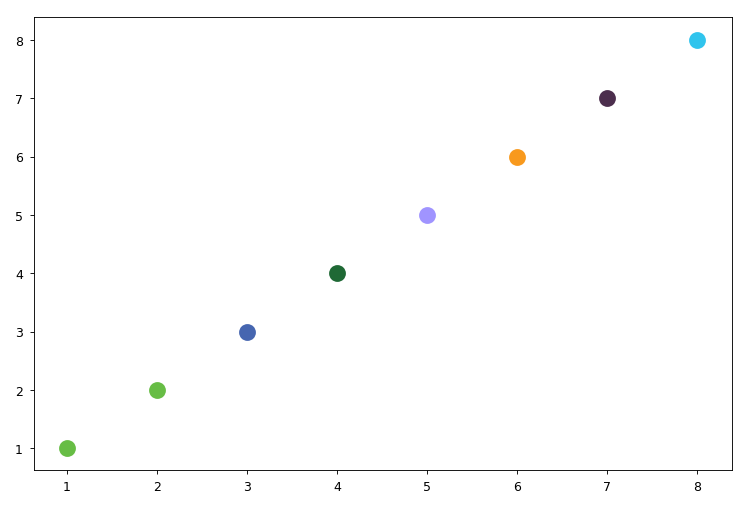

In [13]:
# color dictionary to add
maj_colors = {
    "T cells":"#67bd45",
    "ILC":"#67bd45",
    "B cells":"#4666b0",
    "NK cells":"#1f6935",
    "Dendritic cells":"#a094ff",
    "Monocytes/Macrophages":"#f8991d",
    "Basophils":"#4c2e4d",
    "Neutrophils":"#30c4ed",
}

loc = 0
for key,value in maj_colors.items():
    loc+=1
    plt.scatter(loc,loc,color=value,s=50)

In [14]:
# load current categorical coloring details
path1 = "/Users/rapolaszilionis/Google Drive/analyses/SPRING_dev/data/pittet"
project_dir = path1+'/CSF1Ri/'
new_plot_name = 'all_Cd45pos_cells'

plotpath = project_dir+new_plot_name

# categorical coloring info, I need color dictionaries from this file
cg0 = srz.read_cell_groupings(plotpath+'/categorical_coloring_data.json')

# cell index
cell_ix = np.loadtxt(plotpath+'/cell_filter.txt',dtype=int)

In [15]:
cg0.keys()

dict_keys(['*population', '*population_alt_T_6', '*population_alt_T_9', 'archive_population', 'closest_Immgen', 'closest_Immgen_simplified', 'closest_Zilionis2019_mouse_minor', 'condition', 'library', 'mouse', 'sp_cl_all_cells_clean_iter3_100', 'sp_cl_all_cells_clean_iter3_120', 'sp_cl_all_cells_clean_iter3_150', 'sp_cl_all_cells_clean_iter3_180', 'sp_cl_all_cells_clean_iter3_20', 'sp_cl_all_cells_clean_iter3_200', 'sp_cl_all_cells_clean_iter3_30', 'sp_cl_all_cells_clean_iter3_40', 'sp_cl_all_cells_clean_iter3_5', 'sp_cl_all_cells_clean_iter3_50', 'sp_cl_all_cells_clean_iter3_70', 'sp_cl_all_cells_clean_iter3_80', 'top10pct_dbtl_score', 'top3pct_dbtl_score', 'top5pct_dbtl_score', 'z_dominant_class_sp_cl_all_cells_clean_iter3_100'])

In [16]:
newkeys = [

'*population',
'condition',
'Major cell type',
'closest_Zilionis2019_mouse_minor',
'closest_Immgen',
'closest_Immgen_simplified',
'mouse',
'library',
'sp_cl_all_cells_clean_iter3_100',
'top10pct_dbtl_score', 'top3pct_dbtl_score', 'top5pct_dbtl_score'
    
]   

In [17]:
# color dictionary of dictionaries
cdd = {key:value['label_colors'] for key,value in cg0.items()}

# add color dictionary
cdd['Major cell type'] = maj_colors

cg = obs.iloc[cell_ix][newkeys].astype(str).to_dict(orient='list')

cdd['*population'] = {renamer[key]:value for key,value in cdd['*population'].items()}

In [18]:
# append!
srz.overwrite_cell_groupings(plotpath,cg,backup=True,colordd=cdd)

## Save obs

In [19]:
# save obs
fname = 'backups/obs_info_%dx%d_%s'%(obs.shape[0],obs.shape[1],rz.now())
print(fname)
rz.save_df(obs,fname)

backups/obs_info_27563x32_201025_13h30


In [20]:
!open backups